In [ ]:
import pandas as pd
df=pd.read_csv("/content/diabetes.csv")
df.columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df.head(10)

df.isnull().sum()
df.describe()
df.Outcome.value_counts()  #To check no. of people is suffering or not suffering from the diabetes
#Train Test Split
X=df.drop("Outcome",axis="columns")
y=df.Outcome
#Lets use the Standardscaler so that the value didn't differ to much
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [ ]:
#Let split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,stratify=y,random_state=10)

X_train.shape

X_test.shape

y_train.value_counts()#To check no. of people is suffering or not suffering from the diabetes in y train dataset

,count
Outcome,
0,375
1,201


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# Plot display in notebook
%matplotlib inline

# Basic info
print("\nDataset shape:", df.shape)
print("\nData types and non-null counts:")
df.info()




Dataset shape: (768, 9)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Lets first use without bagging decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Using the cross validation then store the score value in score obj then take the mean
scores=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
scores

scores.mean()

np.float64(0.711060181648417)

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Show column names
print("Column names in the dataset:")
print(df.columns.tolist())

# Drop 'id' if exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Set correct target column
target_column = 'Outcome'

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine for display
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Show first few rows
print("\nTrain Dataset:")
display(train_data.head())

print("\nTest Dataset:")
display(test_data.head())


Column names in the dataset:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Train Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1



Test Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Drop 'id' column if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# ✅ Correct target column for diabetes dataset
target_column = 'Outcome'

# Split into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Ensure convergence
model.fit(X_train, y_train)

# Predict on train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")


Training Accuracy: 0.7704
Testing Accuracy:  0.7468


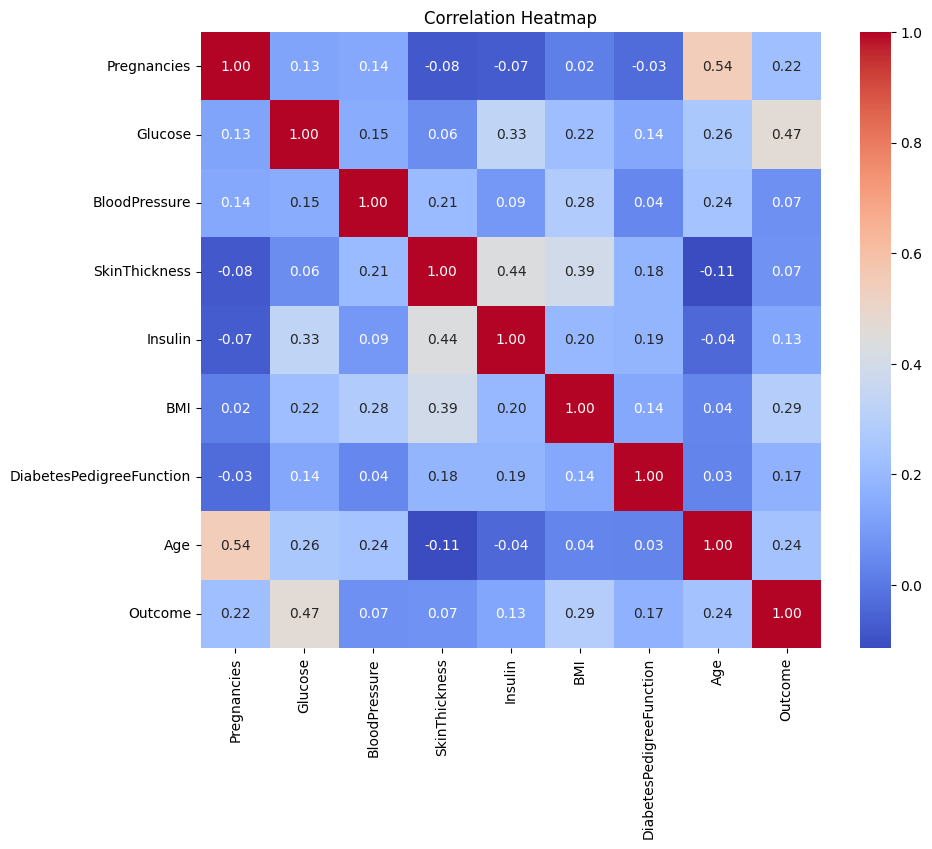

In [ ]:
# 5. Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

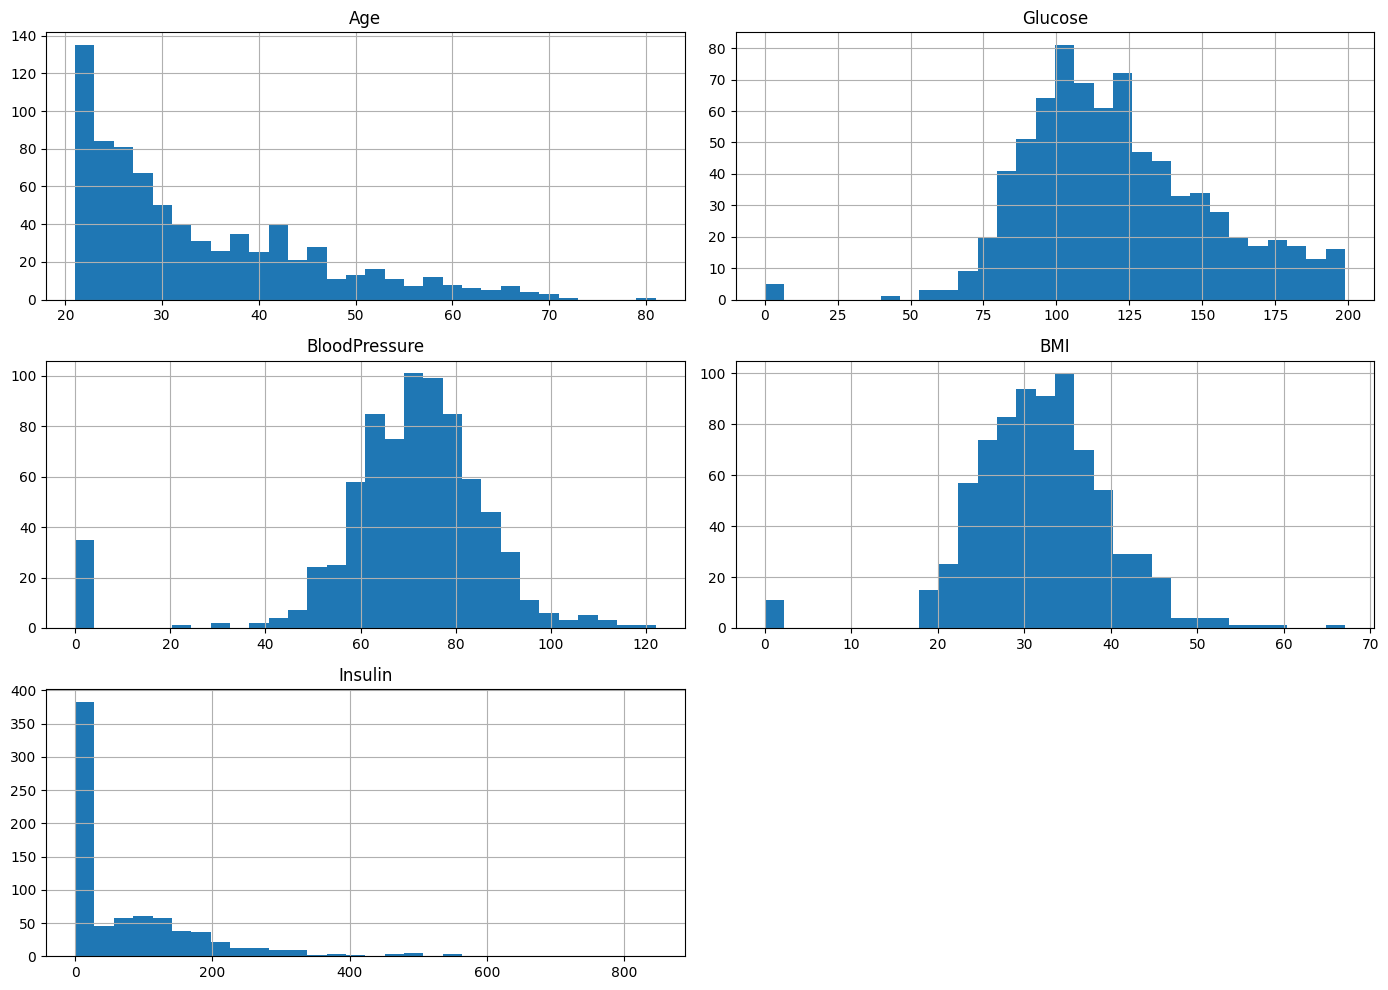

In [ ]:
df[['Age', 'Glucose', 'BloodPressure', 'BMI', 'Insulin']].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()
